### Printing out the Branches in the data to see what's available.

In [3]:
import ROOT
f = ROOT.TFile.Open("/mnt/data/eos/simulations/eos_ambe_10k/eos_ambe_80k_water_comb.root")
output = f.Get("output")
output.Print()

******************************************************************************
*Tree    :output    : output                                                 *
*Entries :   121733 : Total =       637126051 bytes  File  Size =  242559058 *
*        :          : Tree compression factor =   2.63                       *
******************************************************************************
*Br    0 :mcpdg     : mcpdg/I                                                *
*Entries :   121733 : Total  Size=     489117 bytes  File Size  =       4546 *
*Baskets :       20 : Basket Size=      61440 bytes  Compression= 107.44     *
*............................................................................*
*Br    1 :mcx       : mcx/D                                                  *
*Entries :   121733 : Total  Size=     977481 bytes  File Size  =     671146 *
*Baskets :       36 : Basket Size=     122368 bytes  Compression=   1.45     *
*...................................................

### AmBe Analysis. ###
This block of code just prints out the data that's available in the root file.<br>
It looks like fitted_time and fitted_pulse_height are just 9999. So they might not be valid yet.<br>
The total_charge seems to be an event wide variable and there are multiple pulse_height in each event.<br>


In [9]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd

run_number = "SIM"

rdf = ROOT.RDataFrame("output","/mnt/data/eos/simulations/eos_ambe_10k/eos_ambe_80k_water_comb.root")
nhits = rdf.AsNumpy(columns=["nhits"])["nhits"]
triggerTime = rdf.AsNumpy(columns=["triggerTime"])["triggerTime"]
for iEvt in range(0,2): #range(0,len(nhits)):
    print("Event = ", iEvt, "nhit",nhits[iEvt],"triggerTime =",triggerTime[iEvt])
    #for iPulse in range(0,len(triggerTime[iEvt])):
        #print("triggerTime", triggerTime[iEvt][iPulse])

Event =  0 nhit 11 triggerTime = 104810.45000000001
Event =  1 nhit 47 triggerTime = 4.550000000000001


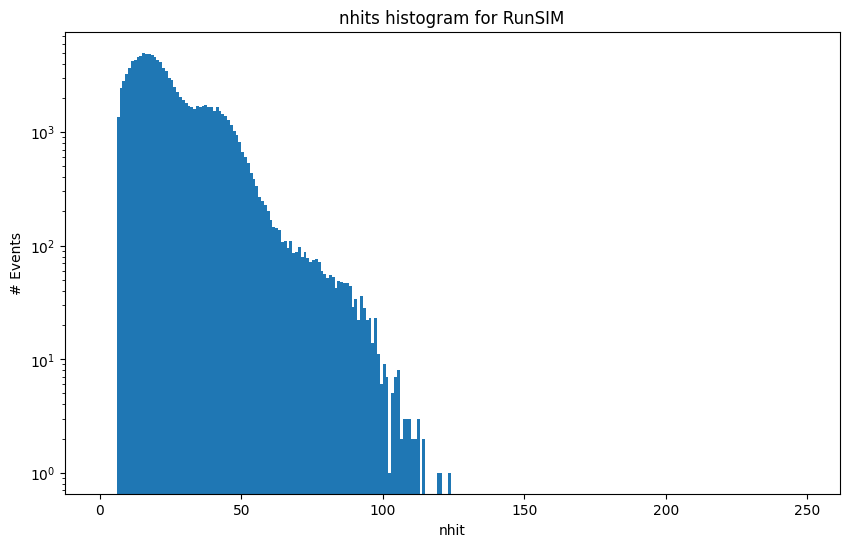

In [15]:
### Plot of nhits
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd

run_number = "SIM"

rdf = ROOT.RDataFrame("output","/mnt/data/eos/simulations/eos_ambe_10k/eos_ambe_80k_water_comb.root")
nhits = rdf.AsNumpy(columns=["nhits"])["nhits"]

plt.figure(figsize=(10,6))
plt.hist(nhits,bins=range(0,250))
plt.title("nhits histogram for Run"+run_number)
plt.xlabel("nhit")
plt.ylabel("# Events")
plt.yscale('log')
plt.show()

### Correlating gamma and neutron events.
Let's see if we can see a gamma then a neutron on the next event using nhit.

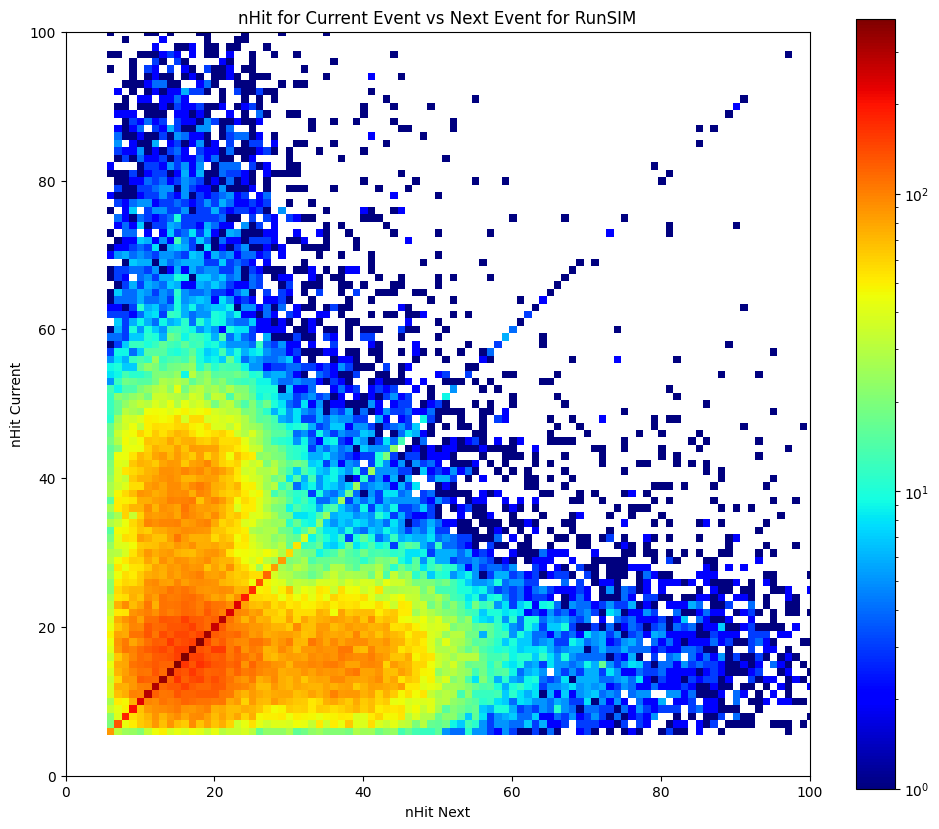

In [13]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd

run_number = "SIM"

rdf = ROOT.RDataFrame("output","/mnt/data/eos/simulations/eos_ambe_10k/eos_ambe_80k_water_comb.root")
nhit = rdf.AsNumpy(columns=["nhits"])["nhits"]

NHits_CurrentNext = np.zeros([225,225],int)

for iEvt in range(0,len(nhit)-1):
    if(nhit[iEvt] < 225 and nhit[iEvt+1]<225):
        NHits_CurrentNext[nhit[iEvt],nhit[iEvt+1]]+=1

plt.figure(figsize=(12,10))
plt.imshow(NHits_CurrentNext,origin='lower',cmap='jet',norm=colors.LogNorm())
plt.title("nHit for Current Event vs Next Event for Run"+run_number)
plt.xlabel("nHit Next")
plt.ylabel("nHit Current")
plt.xlim(0,100)
plt.ylim(0,100)
plt.colorbar()
plt.show()